# Regresión lineal multivariable

## Importando datos

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

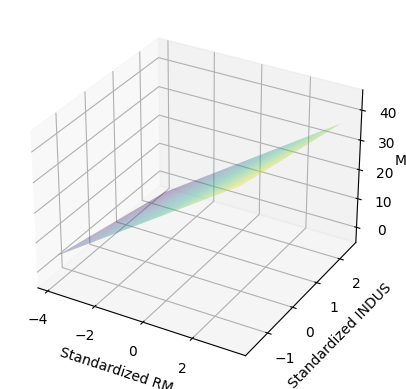

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Asumo que 'df' es tu DataFrame y que ya lo has cargado correctamente.
# Ejemplo: X = df[['RM', 'INDUS']].values, y = df['MEDV'].values.reshape(-1, 1)

# Preprocesamiento con escalado estándar
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

# Ajuste del modelo de regresión lineal
slr = LinearRegression()
slr.fit(X_std, y_std)

# Creación de la malla para la gráfica
X1, X2 = np.meshgrid(np.linspace(X_std[:, 0].min(), X_std[:, 0].max(), 100),
                     np.linspace(X_std[:, 1].min(), X_std[:, 1].max(), 100))

# Predicción sobre la malla creada
X_pred = np.column_stack([X1.ravel(), X2.ravel()])
y_pred = slr.predict(X_pred).reshape(X1.shape)

# Gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Asegúrate de invertir la transformación de escala para mostrar los valores originales en el eje Y
y_pred_original = sc_y.inverse_transform(y_pred)

ax.plot_surface(X1, X2, y_pred_original, alpha=0.4, cmap='viridis')
ax.set_xlabel('Standardized RM')
ax.set_ylabel('Standardized INDUS')
ax.set_zlabel('MEDV')

plt.show()


## Generando predicción con el modelo

In [8]:
import numpy as np

# Suponiendo que queremos usar 5.0 como el número de habitaciones y un valor típico para INDUS
num_rooms = 5.0
indus_value = df['INDUS'].mean()  # Usando el promedio de INDUS del DataFrame como ejemplo

# Crear un array con ambas características
input_features = np.array([[num_rooms, indus_value]])

# Escalar las características
input_features_std = sc_x.transform(input_features)

# Predecir usando el modelo ajustado
price_std = slr.predict(input_features_std)

# Invertir la transformación de escala para obtener el precio en miles
price_in_thousands = sc_y.inverse_transform(price_std)

print('El precio en miles es de %.3f' % price_in_thousands)


El precio en miles es de 12.484


<ipython-input-8-c8f40c25e0ac>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('El precio en miles es de %.3f' % price_in_thousands)
